In [1]:
#!/bin/usr/env python
import scipy
from scipy import ndimage, misc, signal
import skimage
from skimage import img_as_ubyte
import numpy as np
import matplotlib.image as mpimg #image reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colors

In [2]:
data_dir='/home/leasanspy/Dropbox/RA_Fermilab/Lenses_DataSet/CASSOWARY/cassowary_download/' #location of data
#getting image
file_name='obj_ra120.05441848_dec8.20232396'
image_file=data_dir+file_name
img = mpimg.imread(image_file)

In [3]:
# Convert the image taking each channel
R = img[:, :, 0] #red
G = img[:, :, 1] #green
B = img[:, :, 2] #blue

In [4]:
#fil_sig=signal.wiener(R, mysize=None, noise=None) #test

In [5]:
#you should use float 32 or something better or you will get NaN values.
fil_sig=signal.wiener(img.astype('float64'), mysize=None, noise=None) #filter signal

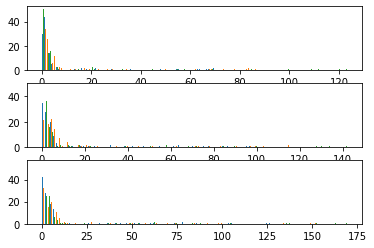

In [6]:
#hist, bin_edges = np.histogram(fil_sig)
fig_t, axs_t = plt.subplots(3,1)
axs_t[0].hist(fil_sig[0], bins='auto')
axs_t[1].hist(fil_sig[1], bins='auto')
axs_t[2].hist(fil_sig[2], bins='auto')
plt.show()
#fil_sig.max()

In [7]:
print(type(R[0,0]))
print(type(fil_sig[0,0]))
#R.shape
#fil_sig.shape
#fil_sig_unit=img_as_ubyte(fil_sig)
#type(R[0,0])
#type(fil_sig[0,0])

<class 'numpy.uint8'>
<class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


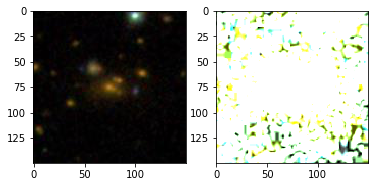

In [8]:
fig_t, axs_t = plt.subplots(1,2)
axs_t[0].imshow(img)
axs_t[1].imshow(fil_sig)

# Image normalization
The signal needs to be normalize in order to keep the range between zero and 255. An it needs to be rounded before converted to uint8 format.

In [9]:
I=255*(fil_sig-fil_sig.min())/(fil_sig.max()-fil_sig.min())
I=I.round()
I = I.astype(np.uint8)
print('maximum',I.max())
print('minimum',I.min())
print('maximum',img.max())
print('minimum',img.min())

maximum 255
minimum 0
maximum 255
minimum 0


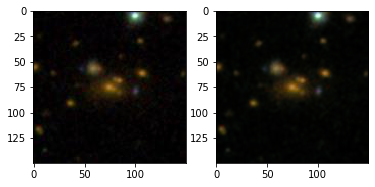

In [10]:
fig_t, axs_t = plt.subplots(1,2)
axs_t[0].imshow(img)
axs_t[1].imshow(I)